<a href="https://colab.research.google.com/github/jfarias11/worskshop-test/blob/main/BDSiC_Alzheimers_and_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing needed libraries:

In [ ]:
import pandas as pd
import numpy as np
# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# Import seaborn and apply its plotting styles
import seaborn as sns
#Importing pylab as plt
import pylab as plt
#using venn diagrams from previous library
from matplotlib_venn import venn3, venn3_circles
#using venn diagrams from previous library
from matplotlib_venn import venn2
# Statmodels & patsy
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import pearsonr, norm, ttest_ind, skewnorm

# Null Hypothesis:


*   $H_o$= *...enter*

*   $H_a$= *...enter*




#Plan:

###Exploratory research?: Finding relationships/associations between variables


###variables to explore with general dataset (https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset):
*   AD diagnosis and DM diagnosis correlation: $H_o$=There is no "significance" between AD diagnosis and DM diagnosis
* Cholesterol types and DM diagnosis
* Cholesterol types, DM diagnosis, Diet, and AD diagnosis



In [ ]:
#importing excel sheet through pandas (UPLOAD FILE FIRST)
df=pd.read_csv("alzheimers_disease_data.csv")
#test print of basic dataset
#print(df)


In [ ]:
#checking for duplicates in the following lines
#isolating the patient ID column
#patientID=df["PatientID"]

1 ~~~~~~~~~~~~~~~~~~~~
2 ~~~~~~~~~~~~~~~~~~~~
3 ~~~~~~~~~~~~~~~~~~~~


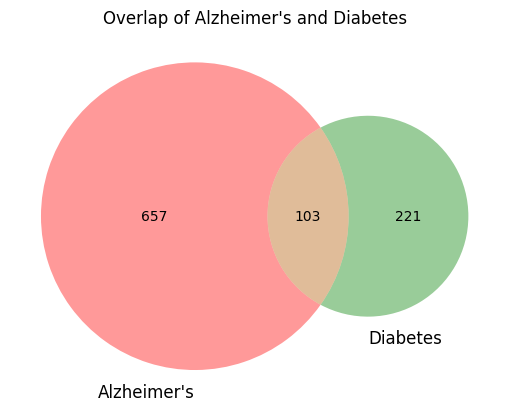

In [ ]:
#venn diagram of AD and DM diagnosis| link for venn --> https://pypi.org/project/matplotlib-venn/
#slicing columnts of AD diagnosis amd DM diagnosis
df_AD_DM=df[["Diagnosis","Diabetes"]]
#print(df_AD_DM)
#venn diagram of AD and DM setup begins in following lines
#print("1","~"*20)
#isolating patients with confirmed diagnosis per column
#setting up isolated column with variable:
#AD is True for rows where Diagnosis is 1
#DM is True for rows where Diabetes is 1
df_DM=df["Diabetes"]==1
df_AD=df["Diagnosis"]==1
#print("2","~"*20)
#regions for each venn region
v_AD_only= (df_AD & ~df_DM).sum()    # Alzheimer's yes, Diabetes no (counts Alzheimer's diagnosis)
v_DM_only= (~df_AD & df_DM).sum()    # Diabetes yes, Alzheimer's no (counts diabetes diagnosis)
v_AD_DM= (df_AD & df_DM).sum()     # Both yes (Represents the overlap)
#print("3","~"*20)
#plotting venn diagram
#EXAMPLE SYNTAX --> venn3(subsets = (1, 1, 1, 2, 1, 2, 2), set_labels = ('Set1', 'Set2', 'Set3'))
v_ofAD_DM=venn2(subsets=(v_AD_only,v_DM_only,v_AD_DM), set_labels = ("Alzheimer's", "Diabetes"))
#title and demonstrate
plt.title("Overlap of Alzheimer's and Diabetes")
plt.show()
#colors
v_ofAD_DM.get_patch_by_id('10').set_color('blue')   # AD only
v_ofAD_DM.get_patch_by_id('01').set_color('red')   # DM only
v_ofAD_DM.get_patch_by_id('11').set_color('purple')   # overlap